In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('daily-bike-share.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
df['day'] = pd.DatetimeIndex(df.dteday).day

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [6]:
numeric_feature = ['temp','atemp','hum','windspeed']
df[numeric_feature + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


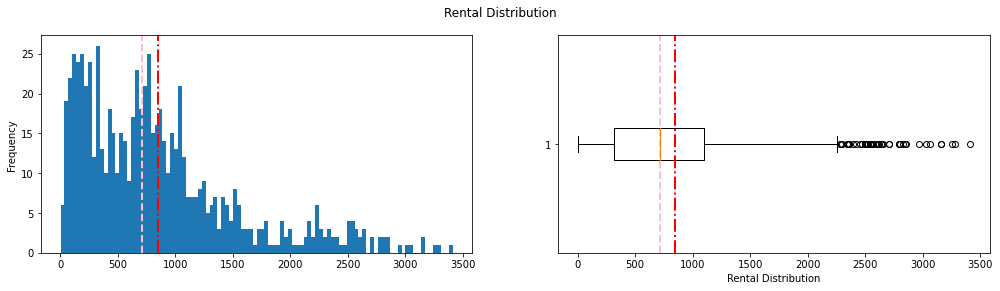

In [7]:
import matplotlib.pyplot as plt

label = df['rentals']

fig, ax = plt.subplots(1,2,figsize=(17,4))

ax[0].hist(x=label,bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(),color='red',linewidth=2,linestyle='-.')
ax[0].axvline(label.median(),color='pink',linewidth=2,linestyle='--')

ax[1].boxplot(x=label,vert=False)
ax[1].axvline(label.mean(),color='red',linewidth=2,linestyle='-.')
ax[1].axvline(label.median(),color='pink',linewidth=2,linestyle='--')
ax[1].set_xlabel('Rental Distribution')

plt.suptitle('Rental Distribution')
plt.show()

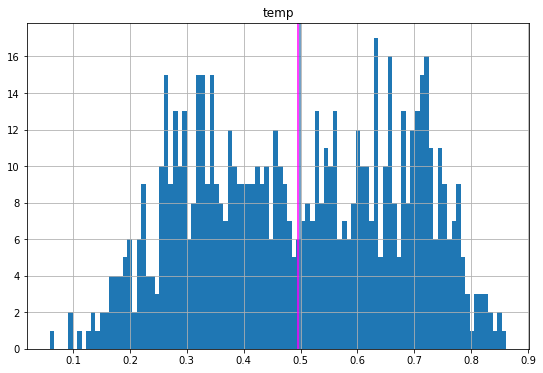

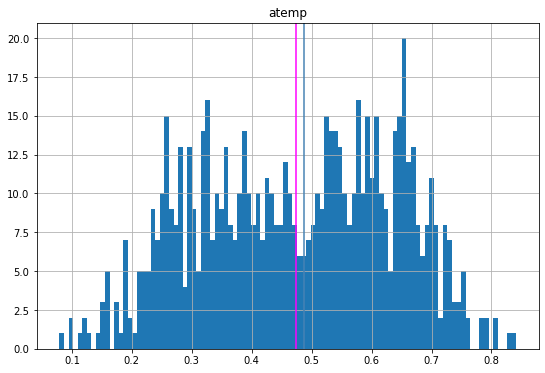

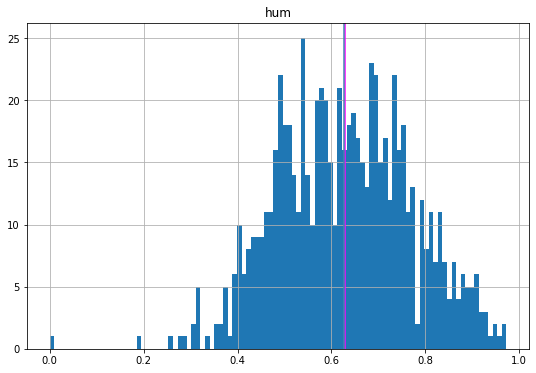

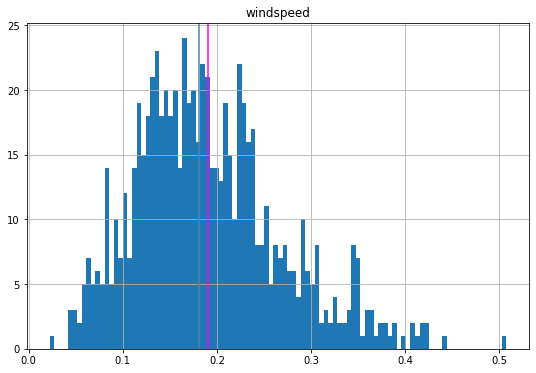

In [8]:
for col in numeric_feature:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(),color='magenta')
    ax.axvline(feature.median(),color='steelblue')
    ax.set_title(col)
    
plt.show()

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [10]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit','day']

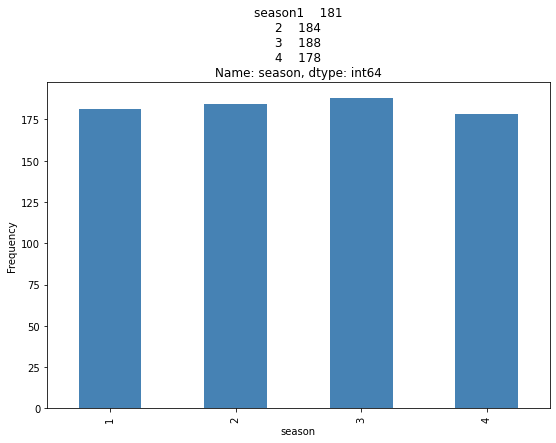

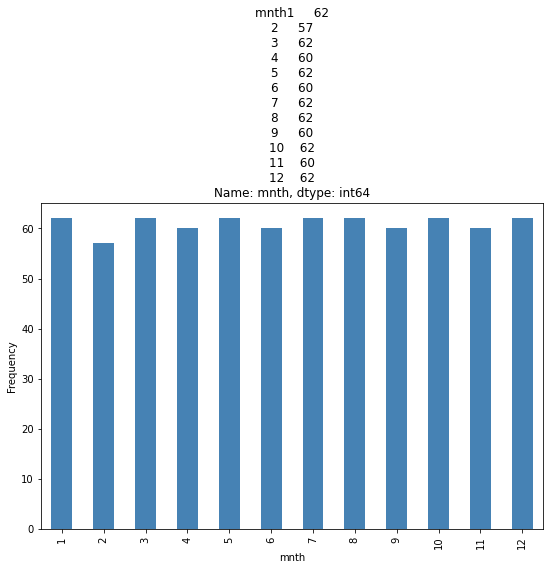

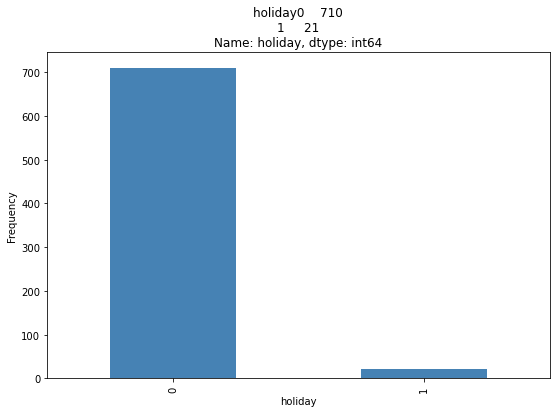

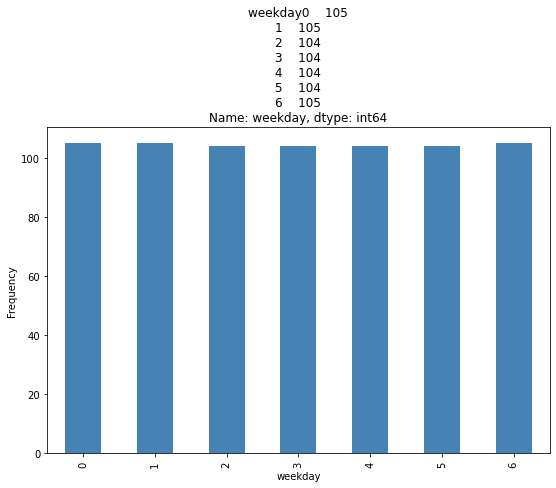

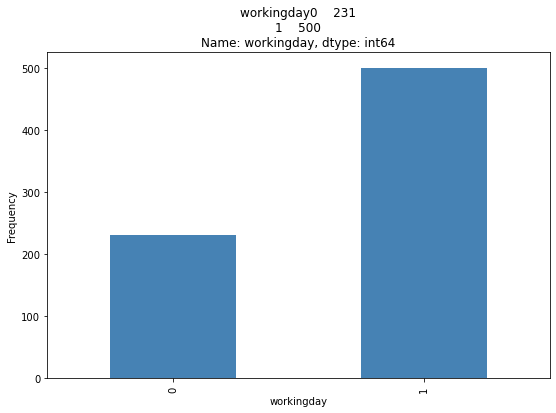

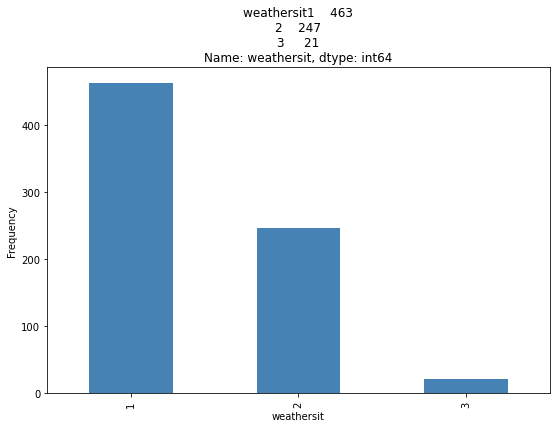

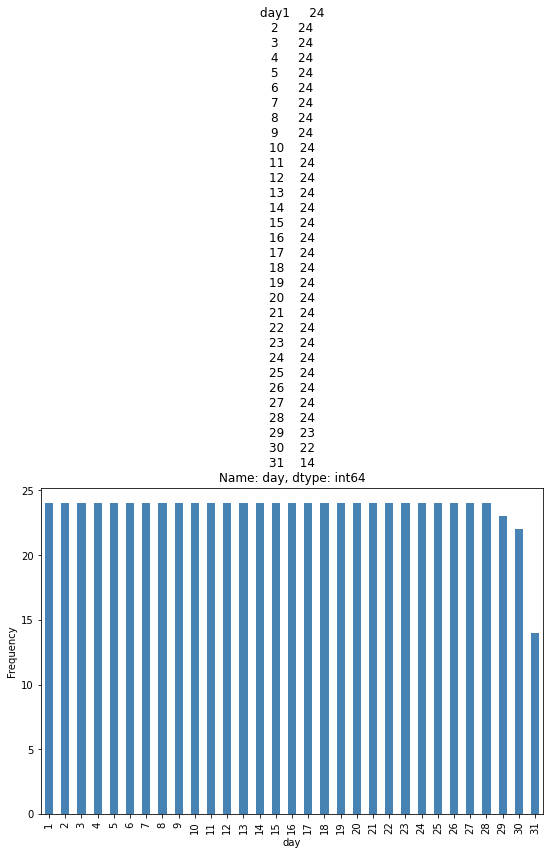

In [11]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + str(counts))
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
plt.show()

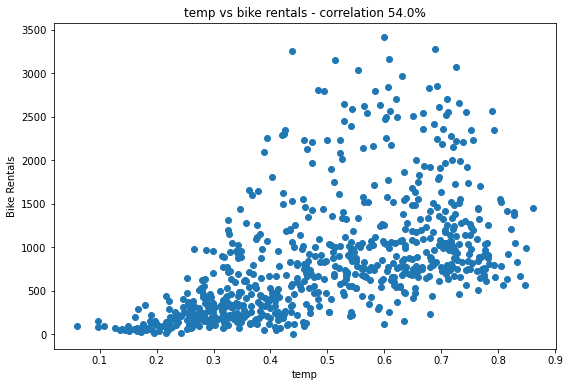

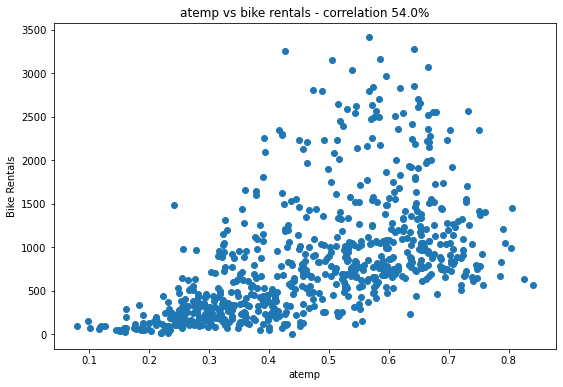

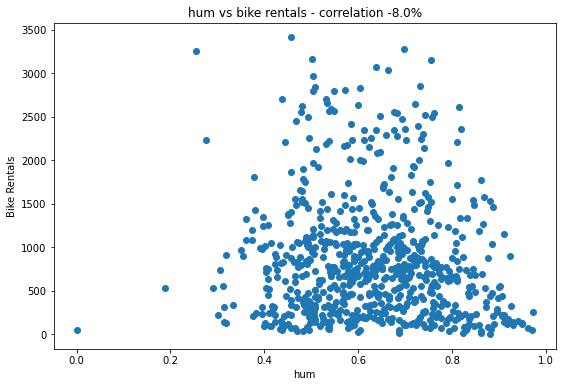

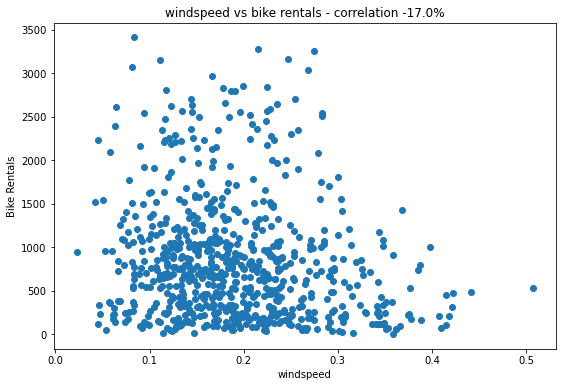

In [21]:
for col in numeric_feature:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    label = df['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title(col + ' vs bike rentals - correlation ' + str((round(correlation,2)*100))+'%')

plt.show()

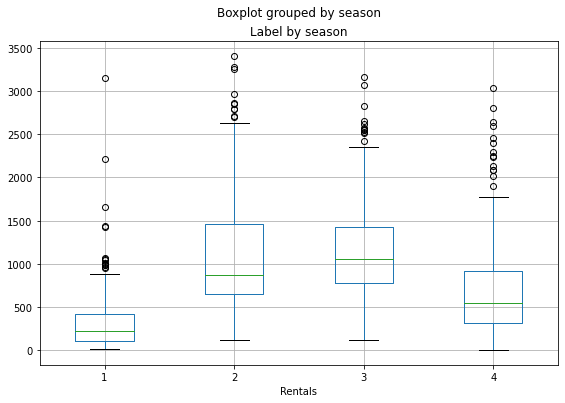

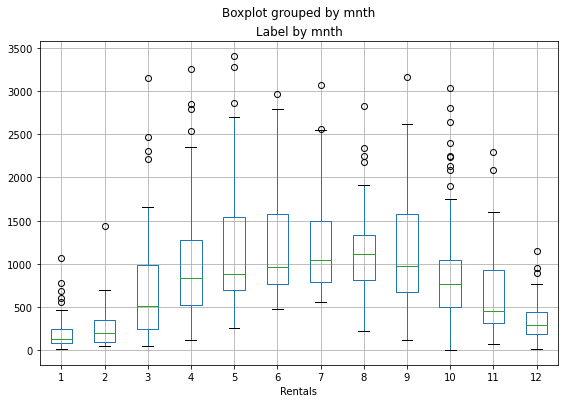

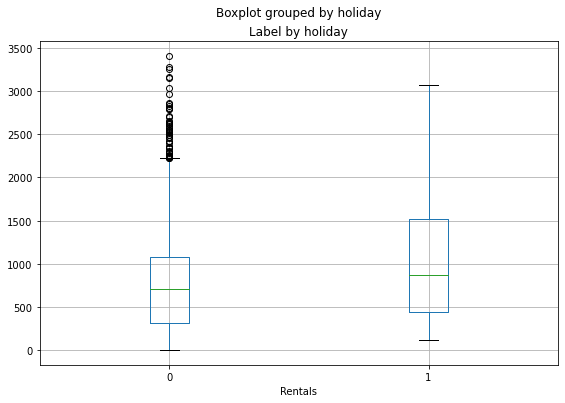

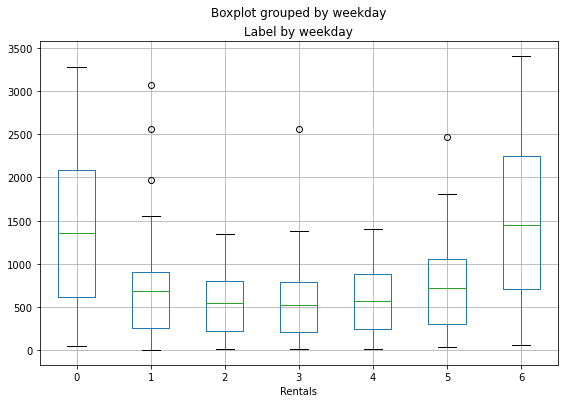

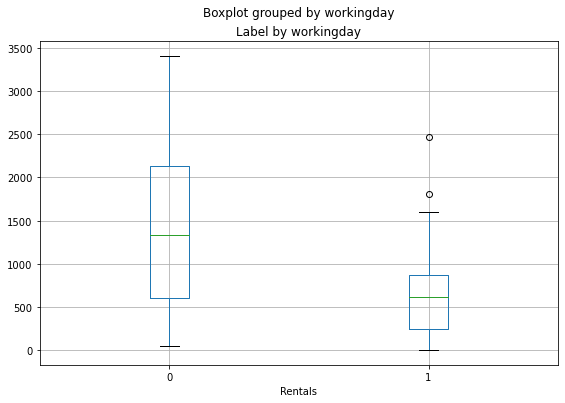

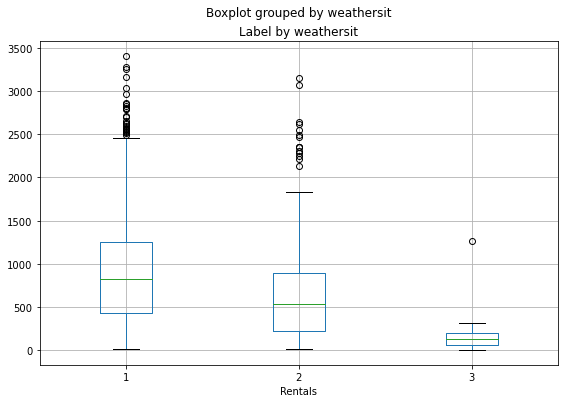

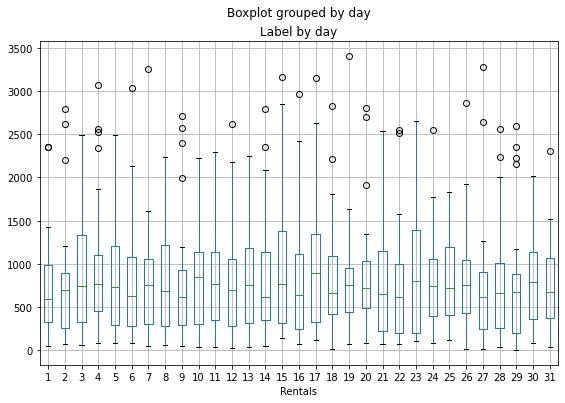

In [29]:
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    df.boxplot(column='rentals',by=col,ax=ax)
    plt.title('Label by '+col)
    plt.xlabel('Rentals')

plt.show()

In [31]:
x, y = df[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']].values, df['rentals'].values

In [37]:
print('Features: ',x[:5],'\nLabel: ',y[:5],sep='\n')

Features: 
[[1.       1.       0.       6.       0.       2.       0.344167 0.363625
  0.805833 0.160446]
 [1.       1.       0.       0.       0.       2.       0.363478 0.353739
  0.696087 0.248539]
 [1.       1.       0.       1.       1.       1.       0.196364 0.189405
  0.437273 0.248309]
 [1.       1.       0.       2.       1.       1.       0.2      0.212122
  0.590435 0.160296]
 [1.       1.       0.       3.       1.       1.       0.226957 0.22927
  0.436957 0.1869  ]]

Label: 
[331 131 120 108  82]


In [38]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=0)

In [47]:
print('Training Set: %d \nTest Set: %d' % (x_train.shape[0], x_test.shape[0]))

Training Set: 584 
Test Set: 147


In [106]:
print('Training Set: {}\nTest Set: {}'.format(x_train.shape[0],x_test.shape[0]))

Training Set: 511
Test Set: 220


In [59]:
from sklearn import linear_model

In [60]:
model = linear_model.LinearRegression()

In [62]:
model.fit(x_train,y_train)
predicted = model.predict(x_test)

In [63]:
from sklearn import metrics

In [64]:
metrics.r2_score(y_test,predicted)

0.6013016737003887

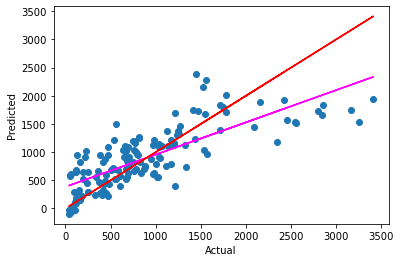

In [97]:
import numpy as np

plt.scatter(y_test,predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
z = np.polyfit(y_test,predicted,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')
plt.plot(y_test,y_test,color='red')
plt.show()

In [102]:
mse = metrics.mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,predicted)
print('MSE: {:.2f}\nRMSE: {:.2f}\nR2: {:.2f}'.format(mse,rmse,r2*100))

MSE: 210673.10
RMSE: 458.99
R2: 60.13


MSE: 103801.66
RMSE: 322.18
R2: 79.65


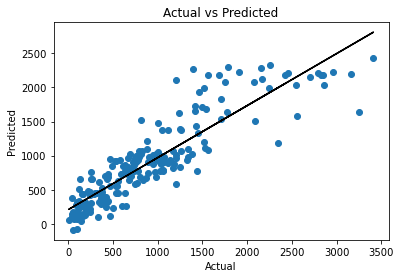

In [117]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
model = GBR().fit(x_train,y_train)
predicted = model.predict(x_test)

mse = metrics.mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,predicted)
print('MSE: {:.2f}\nRMSE: {:.2f}\nR2: {:.2f}'.format(mse,rmse,r2*100))

plt.scatter(y_test,predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
z = np.polyfit(y_test,predicted,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='black')

plt.show()

In [109]:
#We can also create a pipeline for the data and use different algorithms just by minimizing the lines of coding.

from sklearn.compose import ColumnTransformer
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = [6,7,8,9]
numeric_transformer = pipeline.Pipeline(steps=[('scaler',StandardScaler())])

categorical_features = [0,1,2,3,4,5]
categorical_transformer = pipeline.Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

pipeline1 = pipeline.Pipeline(steps=[('preprocessor',preprocessor),
                          ('regressor',GBR())])

model = pipeline1.fit(x_train,y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


In [113]:
predicted = model.predict(x_test)
mse = metrics.mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,predicted)

print("MSE: {}\nRMSE: {}\nR2: {}".format(mse,rmse,r2*100))

MSE: 105651.53886840935
RMSE: 325.0408264640141
R2: 79.28767891239166


In [114]:
pipeline1 = pipeline.Pipeline([('preprocessor',preprocessor),('alg',GBR())])
model = pipeline1.fit(x_train,y_train)
predicted = model.predict(x_test)
mse = metrics.mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,predicted)

In [119]:
print("MSE: {:.2f}\nRMSE: {:.2f}\nR2: {:.2f}".format(mse, rmse, r2*100))

MSE: 103801.66
RMSE: 322.18
R2: 79.65


In [140]:
import joblib
filename = './bike-share.pkl'
joblib.dump(model,filename)

loaded_model = joblib.load(filename)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.225927,0.436957,0.1869]]).astype('float64')
print('New sample: {}'.format(list(X_new[0])))

result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.225927, 0.436957, 0.1869]
Prediction: 112 rentals


In [141]:
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
446.0
673.0
233.0
204.0
261.0
